# Créer ses propres métriques
Ici toutes nos valeurs prédites *y_pred*  devront être dans une zones de tolérance de plus moins 20% par rapport à nos vrai valeurs *y*

## `make_scorer()`

>**`make_scorer(function, greater_is_better)`**  
Paramètres:
- `function` : fonction qui produit notre propre score
- `greater_is_better` : Définit si le score est est bon si il est bon ou petit, pour ainsi faire la différence entre une **Loss** et un **Score**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Génération d'un Dataset 

Text(0, 0.5, 'y')

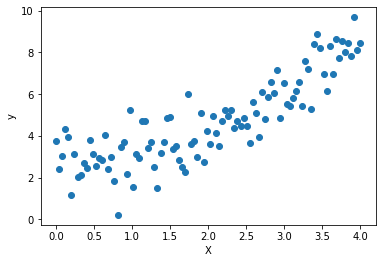

In [9]:
np.random.seed(0)

m =100 #nb d'exemples
X = np.linspace(0, 4, m).reshape((m, 1))
y = 2 + X**1.3 + np.random.randn(m, 1)
y.ravel()

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

## Régression Linéaire
Première itération

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [13]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred = model.predict(X)

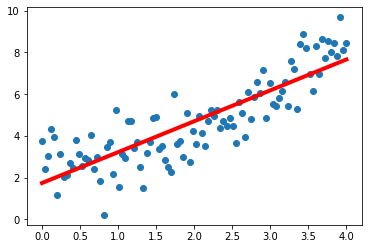

In [21]:
plt.scatter(X, y)
plt.plot(X, y_pred, c="r", lw=4)

### Métrique

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
mean_absolute_error(y, y_pred)

0.8739397321740953

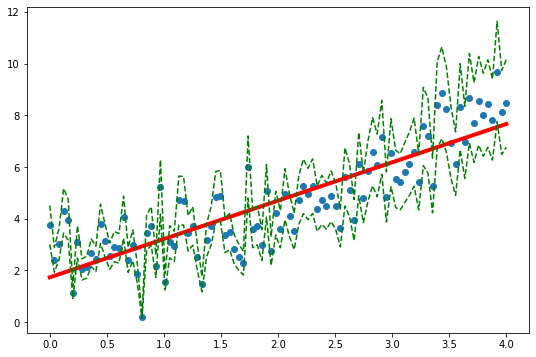

In [33]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, c="r", lw=4)
plt.plot(X, y + y*0.2, c="g", ls="--")
plt.plot(X, y - y*0.2, c="g", ls="--")

## Définir sa métrique 

Calcule la proportion de points prédits *y_pred* qui plus ou moins 20% autour des points de *y_vrai*

In [41]:
def custom_metric(y, y_pred):
    
    return np.sum((y_pred < y + y*0.2) & (y_pred > y - y*0.2)) / y.size
    

In [42]:
custom_metric(y, y_pred)

0.63

63% des prédictions sont proches de plus ou moins 20% des données d'origines.  
Donc 63% des prédictions sont justes avec ce score

## Transformer en Scorer
Pour pouvoir passer notre fonction dans `CrossValidation()` ou 
 `GridSearchCv()` il faut la transformer en *Score* avec `make_scorer()`

In [43]:
from sklearn.metrics import make_scorer

In [46]:
custom_scorer = make_scorer(custom_metric, greater_is_better=True)
#greater_is_better = True 
#Car plus on s'approche de 1 meilleur est notre modéle

## Cross_validation

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(LinearRegression(), X, y, 
                cv=3, scoring=custom_scorer)

array([0.08823529, 0.42424242, 0.3030303 ])